# **Studying Employee Attrition**

#  **Introduction / Background**

IBM is facing an attrition problem and would like to understand which features are impacting attrition the most. A high attrition rate can lead to several challenges impacting both financial and cultural elements of an organization. For example, high turnover is costly and equates in a high cost of employee onboarding/training with little return. It can also lead to personnel issues like low employee morale and lack of leadership. Lastly, loss of trust in the company stakeholders/clients who see team members constantly changing and potentially project schedules impacted. The goal of this project is to define data driven recommendations IBM should implement to help reduce Employee Attrition. What steps can be taken to reduce Employee Attrition and stop employees on their way out?





# **Literature**

# On Employee Attrition

Employee Attrition is extremely costly to organizations and as a result, there is an abundance of literature on the topic. There is actually a segment of Analytics dedicated to analyzing and preventing employees from leaving. A few reputable articles were referenced prior to modeling, to gain a better understanding of the topic. In a study of Work Turnover completed by the ADP Research Institute, "Pay and promotion-related factors" were cited as the "primary drivers of turnover." These sentiments seemed to be overwhemingly echoed as the forerunner is most other articles.Other causes sited were feeling burnt out, and unhappiness with their immediate supervisor, or work enviornment as a whole. It is also significant to note that this dataset was developed pre COVID-19. With all of the workplaces changes realized since then, and the uptick in remote work, it would be interesting to see how similar data would look in a post-COVID world.

https://www.adp.com/tools-and-resources/adp-research-institute/research-and-trends/-/media/RI/pdf/ADP_PredictingTurnOver_White_Paper.ashx
https://hbr.org/2016/09/why-people-quit-their-jobs
https://www.highspeedtraining.co.uk/hub/causes-of-employee-turnover/
https://www.fm-magazine.com/issues/2018/dec/using-predictive-analytics-in-employee-retention.html
https://www.techrepublic.com/article/the-great-resignation-of-2021-are-30-of-workers-really-going-to-quit/





# **Data**

 The target variable was "Attrition", whether or not an employee had left the company. There were 1470 rows and 35 columns in the original dataset. Several columns described protected attributes of the employees, which were dropped from modeling. There were also several features describing elements of the work place, work enviornment and aspects of the job. Several of these were categorical variables, for which dummy variables were created. The data was checked for null values and outliers. In the event that all rows of a variable were identical, the variable was dropped. Binary [Yes,No] values were mapped into [0,1]. Monthly salary was transformed into a log variable, to reduce the skewness and remove outliers in the original monthly income feature. 
The dataset for this project was sourced from Kaggle and can be found at the following link: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset




# **Data Prep**

##Import Modules

In [92]:
# Import modules (can add more as needed)
import numpy as np # For numeric functions
import pandas as pd # For data analysis
import matplotlib.pyplot as plt # For plotting
from pylab import *
import seaborn as sns
import statsmodels.api as sm # For Statistical models
# Modules specific to Splitting Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## **Original Data Set:** 
In the table below we can see the original data set contains 35 variables with 1470 rows. 

Load Data Set

In [93]:
df = pd.read_csv('G:\\MSBAPM Study\\Resume\\Projects\\Github\\HR analytics\\Employee_Attrition.csv') # Link to dataset .csv file Ren File Path
# Row and column count
print('\033[1m'+'Data Frame Row and Column Count:'+'\033[0;0m', df.shape, '\n') 
# Show column names and first few rows
df.head()

Data Frame Row and Column Count: (1470, 35) 



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


##Check Missing Values
We will next check to see if any null values are in our dataset. 

In [94]:
# Explore missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In the next block of code, we dropped the variables which small variations in the data set. We have also chosen to drop the variable for Age and Gender because they belong to protected variables. 

## Drop Columns: 
In the next block of code, we dropped the variables which small variations in the data set. We have also chosen to drop the variable for Age and Gender because they belong to protected variables. 

In [95]:
#Drop few columns
#Protected Attributes: Age, Disability, National Origin, Race/color, Religion, Sex 
df.drop(['Age', 'EmployeeCount', 'EmployeeNumber', 'Gender', 'Over18', 'StandardHours'], axis=1, inplace=True) #Make True for permanent drop from original table

In [96]:
# dropping additional columns that will not be used for modeling
df.drop(['DailyRate', 'HourlyRate', 'MonthlyRate'], axis=1, inplace=True)

##Create new DataFrame:df1 to be used for Modeling

In [97]:
# Create df1 for modeling
df1= pd.DataFrame(df) ; df1.loc[0:3]

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,3,2,Sales Executive,...,3,1,0,8,0,1,6,4,0,5
1,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,2,2,Research Scientist,...,4,4,1,10,3,3,10,7,1,7
2,Yes,Travel_Rarely,Research & Development,2,2,Other,4,2,1,Laboratory Technician,...,3,2,0,7,3,3,0,0,0,0
3,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,3,1,Research Scientist,...,3,3,0,8,3,3,8,7,3,0


In [98]:
#Change Attrition values from (Yes/No) to (1/0)
df1.replace(to_replace=['No', 'Yes'], value=[0,1], inplace=True)

In [99]:
ibm=pd.DataFrame(df1)

In [100]:
businesstravel_mapping={'Non-Travel': 0, 'Travel_Frequently': 2, 'Travel_Rarely': 1}
df1['BusinessTravel']=df1['BusinessTravel'].map(businesstravel_mapping)

# NOTE: They differ in the following: replace accepts str, regex, list, dict, Series, int, float, or None. map accepts a dict or a Series. They differ in handling null values
# df1['BusinessTravel'].replace({"Non-Travel":"0","Travel_Rarely":"1","Travel_Frequently":"2"}, inplace=True);

##Create Dummy Variables for Categorical Features
We will create the dummy variables using the "get_dummies" function since we would like N-1 categorical variable for multiple linear regression.

In [101]:
#Append Categorical variables to the end of df1
# df1 = pd.get_dummies(df1, drop_first=True)
df1=pd.get_dummies(df1, columns=['JobRole','Department','EducationField','MaritalStatus'])
print('\033[1m'+'Data Frame Row and Column Count:'+'\033[0;0m', df1.shape, '\n') 
df1.head(20)

Data Frame Row and Column Count: (1470, 43) 



,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,1,1,2,2,3,2,4,5993,8,...,1,0,1,0,0,0,0,0,0,1
1,0,2,8,1,3,2,2,2,5130,1,...,0,0,1,0,0,0,0,0,1,0
2,1,1,2,2,4,2,1,3,2090,6,...,0,0,0,0,0,1,0,0,0,1
3,0,2,3,4,4,3,1,3,2909,1,...,0,0,1,0,0,0,0,0,1,0
4,0,1,2,1,1,3,1,2,3468,9,...,0,0,0,0,1,0,0,0,1,0
5,0,2,2,2,4,3,1,4,3068,0,...,0,0,1,0,0,0,0,0,0,1
6,0,1,3,3,3,4,1,1,2670,4,...,0,0,0,0,1,0,0,0,1,0
7,0,1,24,1,4,3,1,3,2693,1,...,0,0,1,0,0,0,0,1,0,0
8,0,2,23,3,4,2,3,3,9526,0,...,0,0,1,0,0,0,0,0,0,1
9,0,1,27,3,3,3,2,3,5237,6,...,0,0,0,0,1,0,0,0,1,0


In [102]:
#Log transformation of Monthlyincome
df1['MonthlyIncome_log'] = np.log(df1['MonthlyIncome'])
print(df1)

      Attrition  BusinessTravel  DistanceFromHome  Education  \
0             1               1                 1          2   
1             0               2                 8          1   
2             1               1                 2          2   
3             0               2                 3          4   
4             0               1                 2          1   
...         ...             ...               ...        ...   
1465          0               2                23          2   
1466          0               1                 6          1   
1467          0               1                 4          3   
1468          0               2                 2          3   
1469          0               1                 8          3   

      EnvironmentSatisfaction  JobInvolvement  JobLevel  JobSatisfaction  \
0                           2               3         2                4   
1                           3               2         2                2   
2  

In [103]:
#Drop Old MonthlyIncome column
df1.drop('MonthlyIncome', axis=1, inplace=True)

##Exploratory

In [104]:
df.describe()

,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,9.192517,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,8.106864,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [105]:
print(df1.columns.values)

['Attrition' 'BusinessTravel' 'DistanceFromHome' 'Education'
 'EnvironmentSatisfaction' 'JobInvolvement' 'JobLevel' 'JobSatisfaction'
 'NumCompaniesWorked' 'OverTime' 'PercentSalaryHike' 'PerformanceRating'
 'RelationshipSatisfaction' 'StockOptionLevel' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager'
 'JobRole_Healthcare Representative' 'JobRole_Human Resources'
 'JobRole_Laboratory Technician' 'JobRole_Manager'
 'JobRole_Manufacturing Director' 'JobRole_Research Director'
 'JobRole_Research Scientist' 'JobRole_Sales Executive'
 'JobRole_Sales Representative' 'Department_Human Resources'
 'Department_Research & Development' 'Department_Sales'
 'EducationField_Human Resources' 'EducationField_Life Sciences'
 'EducationField_Marketing' 'EducationField_Medical'
 'EducationField_Other' 'EducationField_Technical Degree'
 'MaritalStatus_Divorced' 'MaritalStatus_Married' 'MaritalStatus_Singl

##Checking Outliers 

In [106]:
# Creat new DataFrame:df2 to be used for Models that are robust to outliers
df2=pd.DataFrame(df1)

C:\Users\n\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


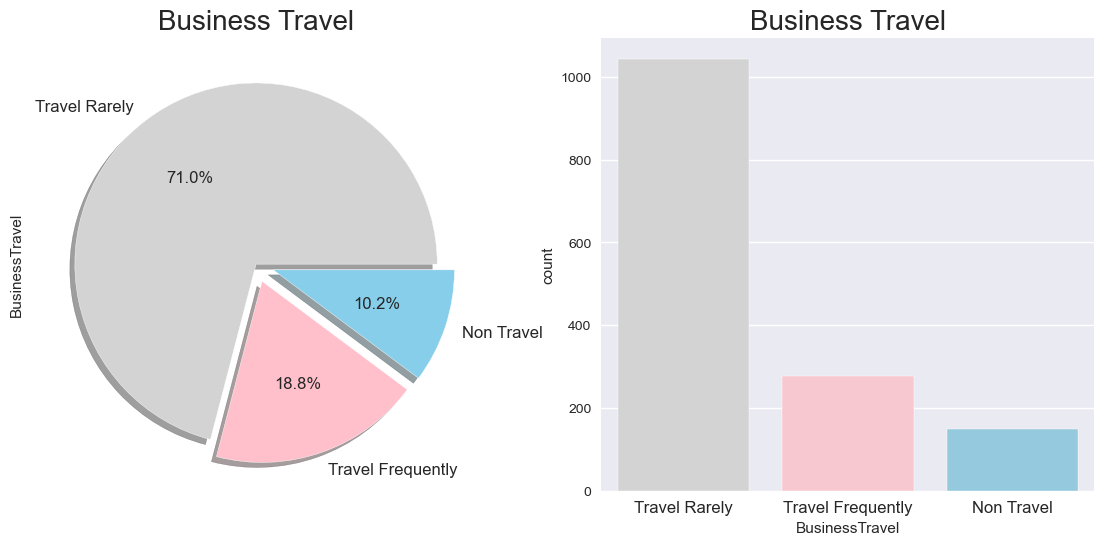

C:\Users\n\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


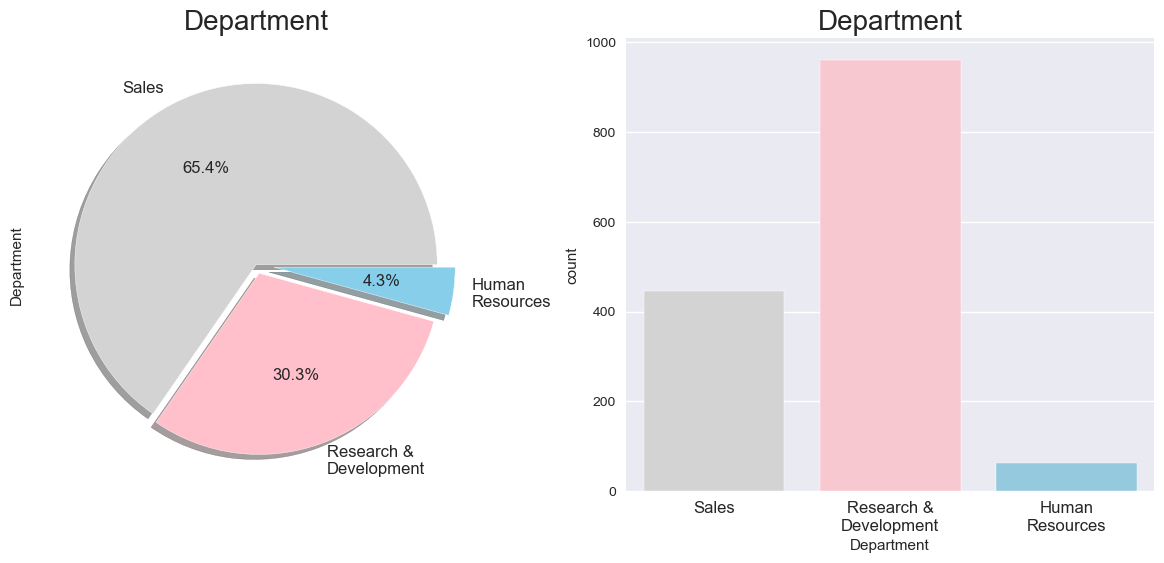

C:\Users\n\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


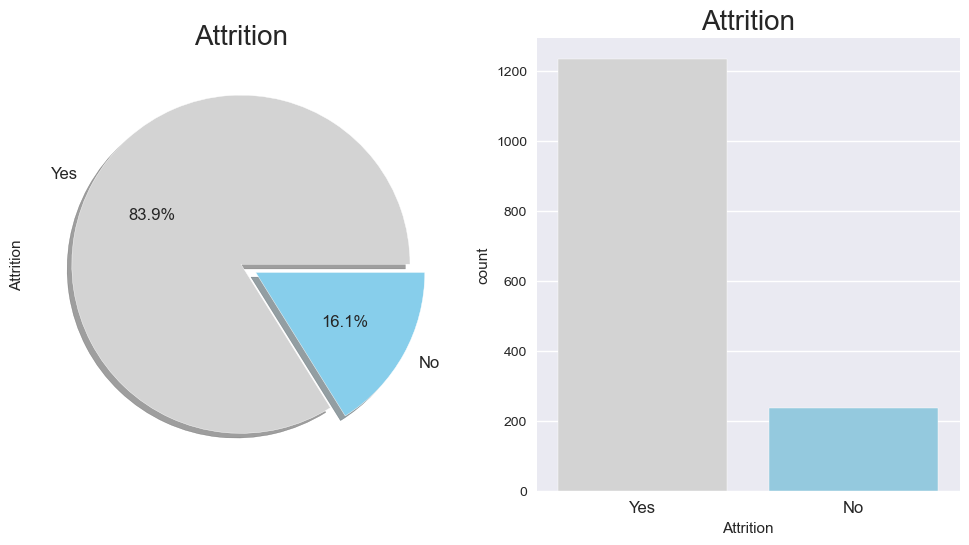

In [107]:
f,ax=plt.subplots(1,2, figsize=(14,6))
labels = 'Travel Rarely', 'Travel Frequently', 'Non Travel'
df['BusinessTravel'].value_counts().plot.pie(explode=[0,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=12,colors = ["lightgrey","pink", "skyblue"])
ax[0].set_title('Business Travel', fontsize=20)
sns.countplot('BusinessTravel',data=df,ax=ax[1], palette=["lightgrey","pink", "skyblue"])
ax[1].set_title('Business Travel', fontsize=20)
ax[1].set_xticklabels(['Travel Rarely', 'Travel Frequently', 'Non Travel'], fontsize=12)
plt.show()

f,ax=plt.subplots(1,2, figsize=(15,6))
labels = 'Sales', 'Research &\nDevelopment', 'Human\nResources'
df['Department'].value_counts().plot.pie(explode=[0,0.05,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=12,colors = ["lightgrey","pink", "skyblue"])
ax[0].set_title('Department', fontsize=20)
sns.countplot('Department',data=df,ax=ax[1], palette=["lightgrey","pink", "skyblue"])
ax[1].set_title('Department', fontsize=20)
ax[1].set_xticklabels(['Sales', 'Research &\nDevelopment', 'Human\nResources'], fontsize=12)
plt.show()

f,ax=plt.subplots(1,2, figsize=(12,6))
labels = 'Yes', 'No'
df['Attrition'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=12,colors = ["lightgrey", "skyblue"])
ax[0].set_title('Attrition', fontsize=20)
sns.countplot('Attrition',data=df,ax=ax[1], palette=["lightgrey", "skyblue"])
ax[1].set_title('Attrition', fontsize=20)
ax[1].set_xticklabels(['Yes', 'No'], fontsize=12)
plt.show()

Exploratory Data Analysis, which refers to the critical process of performing initial investigations on data to discover patterns, to spot anomalies, and to check assumptions with the help of summary statistics and graphical representations. The univariate analysis which explores each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values.

The 1st plot above shows the count of employees who are involve in business travel. Around 10% of employees are non-travelers whereas most of the employees travel rarely. The 2nd plot shows the number of employees working in the department. Most of the employees work in Research & Development department while very few work in the HR department. Third plot shows that the dataset contains around 16% of employees who are terminated.

The next plots show Bivariate analysis which is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them.

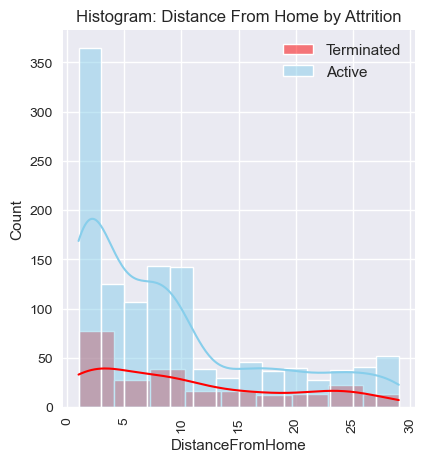

The next plot shows employees Distance From Home by Attrition.
Employees with less distance from home has shown more attrition


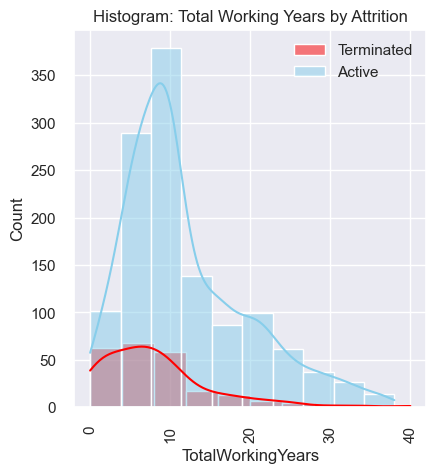

The next plot shows employees Total Working Years by Attrition.
Employees with less number of years has shown more attrition


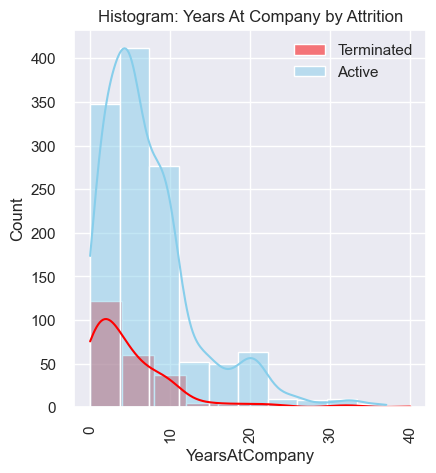

The next plot shows employees Years At Company by Attrition.
Employees who have worked for the company for less years have a greater attrition than those who have worked for the company for more years.


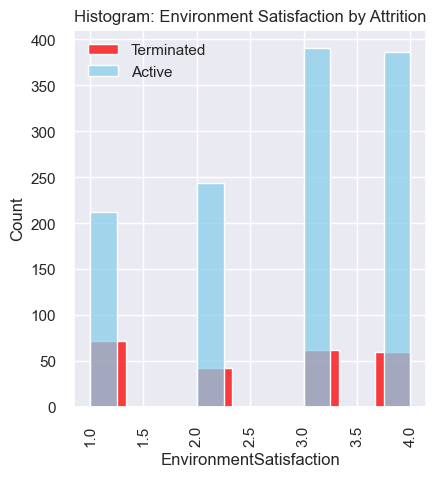

The next plot shows Environment Satisfaction by Attrition.
More employees has shown high and very high level of environment satisfaction


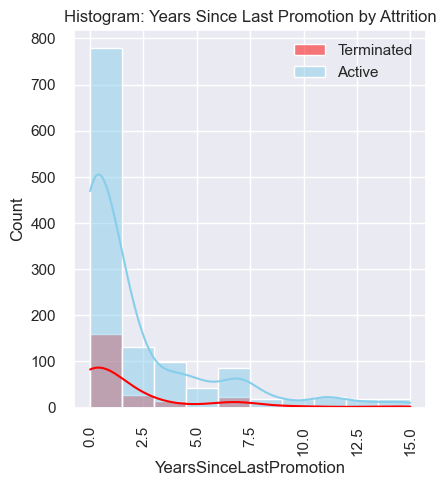

The next plot shows Years Since Last Promotion by Attrition.
Employees with less number of years since last promotion has shown more attrition.


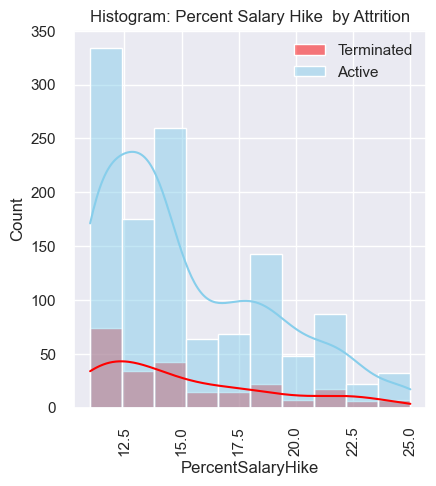

The next plot shows Percent Salary Hike  by Attrition.
Employees with less hike in salary has shown more attrition.
Employees receive a salary ranging from $1009 to $19999. With lower income, attrition is higher. The data is right-skewed, with the mean above the median.


In [108]:
plt.figure(figsize = (10,5))
df_1 = df[df['Attrition'] == 1]
df_0 = df[df['Attrition'] == 0]

plt.subplot(121)
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

#Add DistanceFromHome Histrogram of those with Yes for Attrition with distribution curve 
sns.histplot(data=df_1, x="DistanceFromHome",color="red", label="Terminated", kde=True)

#Add DistanceFromHome Histrogram of those with No for Attrition with distribution curve 
sns.histplot(data=df_0, x="DistanceFromHome",color="skyblue", label="Active", kde=True)


plt.legend() 
plt.xticks(rotation='vertical')
plt.title('Histogram: Distance From Home by Attrition')
plt.show()
print('The next plot shows employees Distance From Home by Attrition.\nEmployees with less distance from home has shown more attrition')
###############################################

plt.figure(figsize = (10,5))
plt.subplot(122)

#Add TotalWorkingYears Histrogram of those with Yes for Attrition with distribution curve 
sns.histplot(data=df_1, x="TotalWorkingYears",color="red", label="Terminated", kde=True, bins = 10)

#Add TotalWorkingYears Histrogram of those with No for Attrition with distribution curve 
sns.histplot(data=df_0, x="TotalWorkingYears",color="skyblue", label="Active", kde=True, bins = 10)


plt.legend() 
plt.xticks(rotation='vertical')
plt.title('Histogram: Total Working Years by Attrition')
plt.show()
print('The next plot shows employees Total Working Years by Attrition.\nEmployees with less number of years has shown more attrition')
###############################################

plt.figure(figsize = (10,5))
plt.subplot(122)

#Add YearsAtCompany Histrogram of those with Yes for Attrition with distribution curve 
sns.histplot(data=df_1, x="YearsAtCompany",color="red", label="Terminated", kde=True, bins = 10)

#Add YearsAtCompany Histrogram of those with No for Attrition with distribution curve 
sns.histplot(data=df_0, x="YearsAtCompany",color="skyblue", label="Active", kde=True, bins = 10)


plt.legend() 
plt.xticks(rotation='vertical')
plt.title('Histogram: Years At Company by Attrition')
plt.show()
print('The next plot shows employees Years At Company by Attrition.\nEmployees who have worked for the company for less years have a greater attrition than those who have worked for the company for more years.')
################################################

plt.figure(figsize = (10,5))
plt.subplot(122)

#Add EnvironmentSatisfaction Histrogram of those with Yes for Attrition with distribution curve 
sns.histplot(data=df_1, x="EnvironmentSatisfaction",color="red", label="Terminated", kde=False)

#Add EnvironmentSatisfaction Histrogram of those with No for Attrition with distribution curve 
sns.histplot(data=df_0, x="EnvironmentSatisfaction",color="skyblue", label="Active", kde=False)


plt.legend() 
plt.xticks(rotation='vertical')
plt.title('Histogram: Environment Satisfaction by Attrition')
plt.show()
print('The next plot shows Environment Satisfaction by Attrition.\nMore employees has shown high and very high level of environment satisfaction')
################################################

plt.figure(figsize = (10,5))
plt.subplot(122)

#Add YearsSinceLastPromotion Histrogram of those with Yes for Attrition with distribution curve 
sns.histplot(data=df_1, x="YearsSinceLastPromotion",color="red", label="Terminated", kde=True, bins = 10)

#Add YearsSinceLastPromotion Histrogram of those with No for Attrition with distribution curve 
sns.histplot(data=df_0, x="YearsSinceLastPromotion",color="skyblue", label="Active", kde=True, bins = 10 )


plt.legend() 
plt.xticks(rotation='vertical')
plt.title('Histogram: Years Since Last Promotion by Attrition')
plt.show()
print('The next plot shows Years Since Last Promotion by Attrition.\nEmployees with less number of years since last promotion has shown more attrition.')
################################################
plt.figure(figsize = (10,5))
plt.subplot(122)

#Add PercentSalaryHike Histrogram of those with Yes for Attrition with distribution curve 
sns.histplot(data=df_1, x="PercentSalaryHike",color="red", label="Terminated", kde=True, bins = 10)

#Add PercentSalaryHike Histrogram of those with No for Attrition with distribution curve 
sns.histplot(data=df_0, x="PercentSalaryHike",color="skyblue", label="Active", kde=True, bins = 10 )


plt.legend() 
plt.xticks(rotation='vertical')
plt.title('Histogram: Percent Salary Hike  by Attrition')
plt.show()
print('The next plot shows Percent Salary Hike  by Attrition.\nEmployees with less hike in salary has shown more attrition.\nEmployees receive a salary ranging from $1009 to $19999. With lower income, attrition is higher. The data is right-skewed, with the mean above the median.')

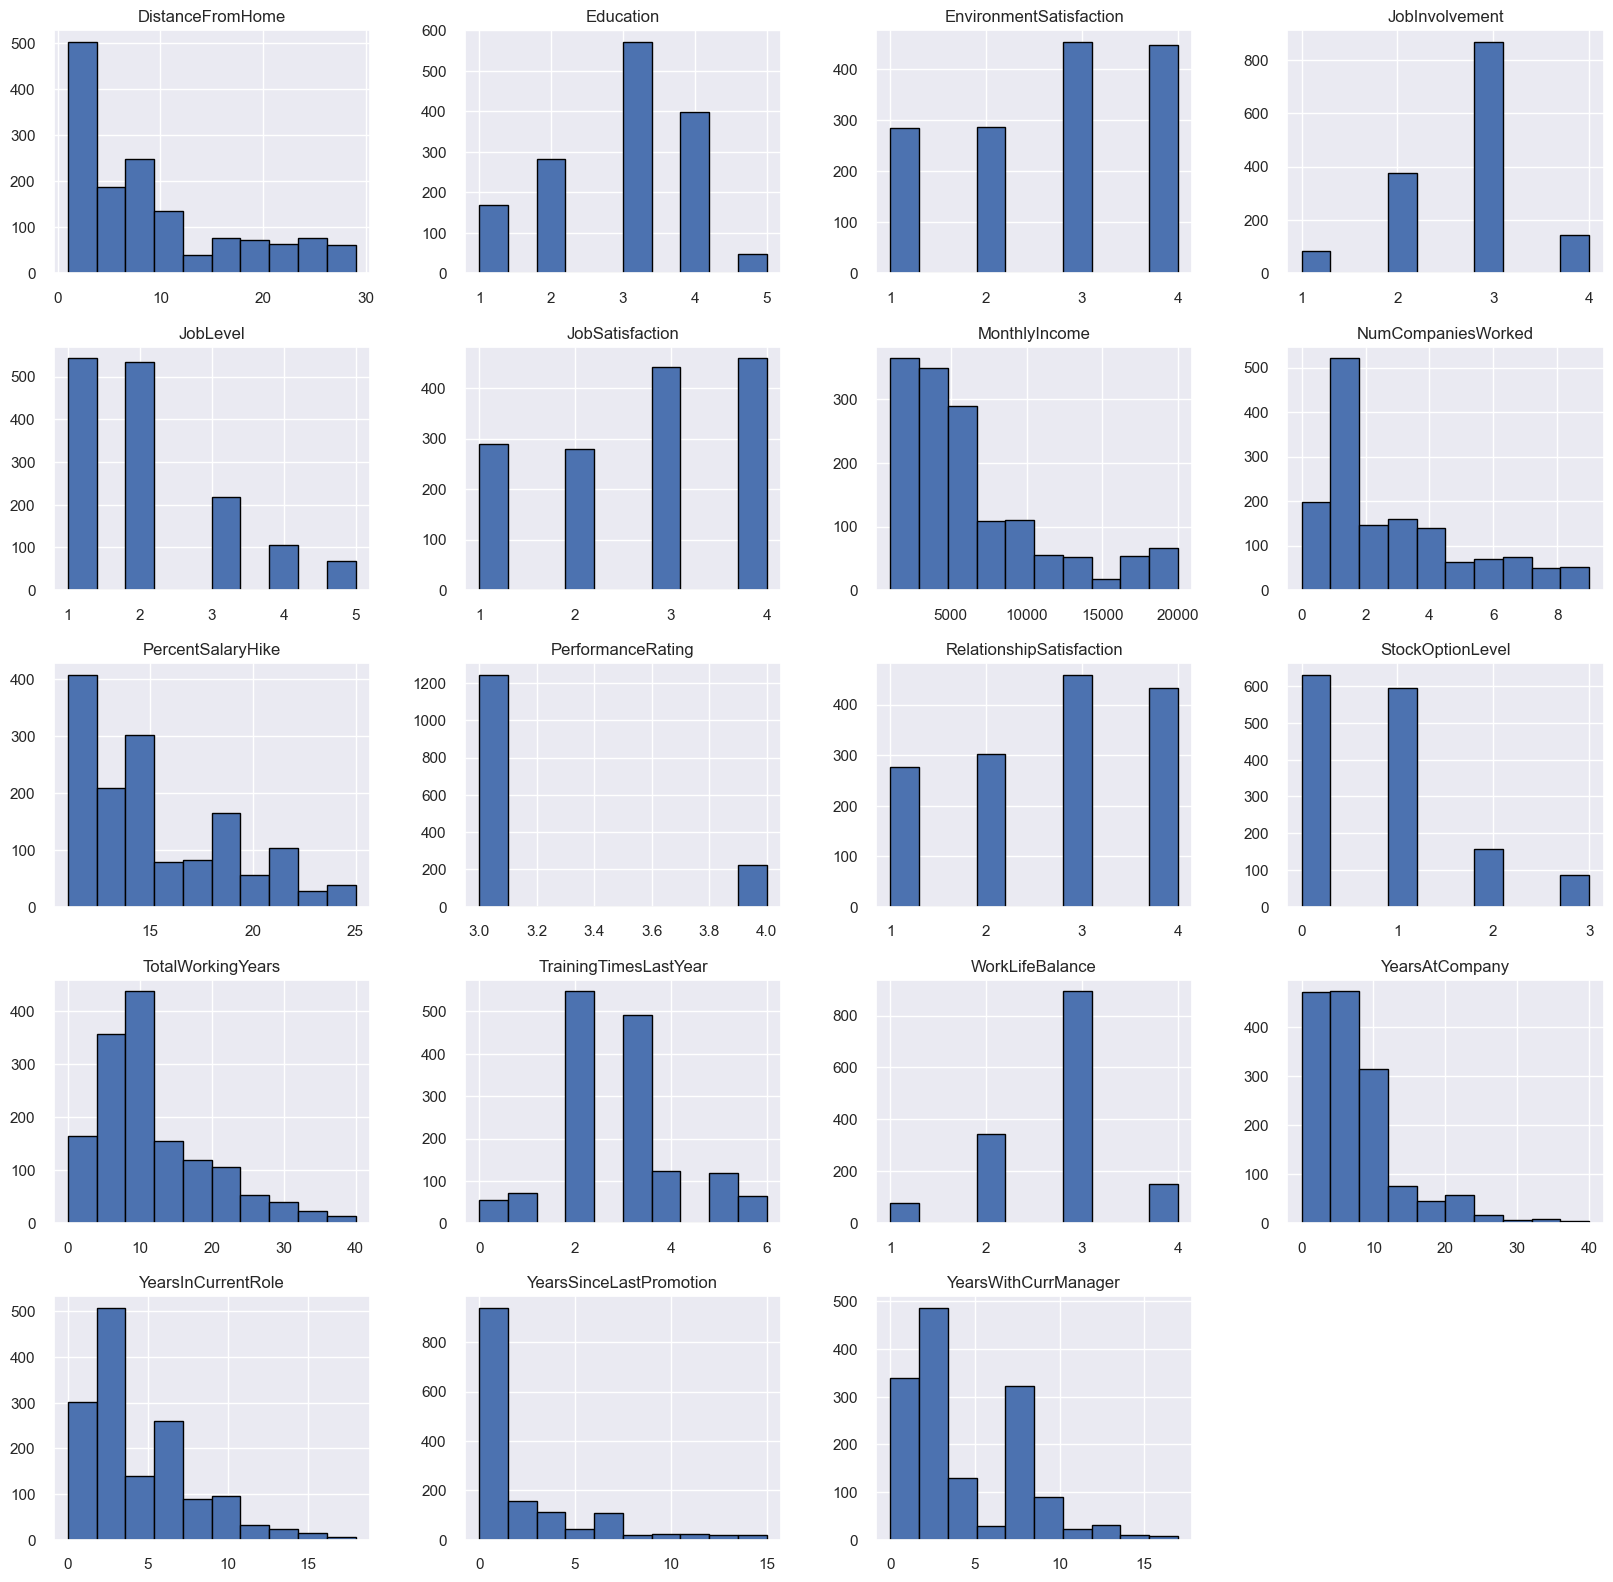

In [109]:
# Visualizing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1, figsize=(20, 20));

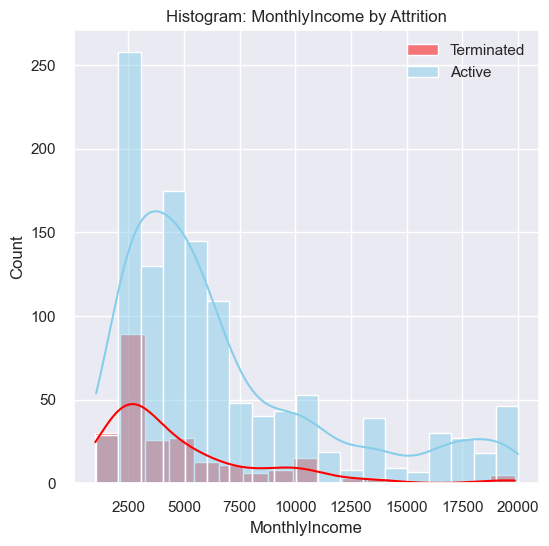

In [110]:
plt.figure(figsize = (6,6))
df_1 = df[df['Attrition'] == 1]
df_0 = df[df['Attrition'] == 0]
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
#Add MonthlyIncome Histrogram of those with Yes for Attrition with distribution curve 
sns.histplot(data=df_1, x="MonthlyIncome",color="red", label="Terminated", kde=True)
#Add MonthlyIncome Histrogram of those with No for Attrition with distribution curve 
sns.histplot(data=df_0, x="MonthlyIncome",color="skyblue", label="Active", kde=True)
plt.legend() 
plt.title('Histogram: MonthlyIncome by Attrition')
plt.show()

•	Outliers are problematic for many statistical analyses because they can cause tests to either miss significant findings or distort real results.
•	When it comes to skewed distributions, the most common response is to transform the data
•	Generally, the most common type of skewness is right-skewness 
•	Consequently, the most common type of transformation is the log transform


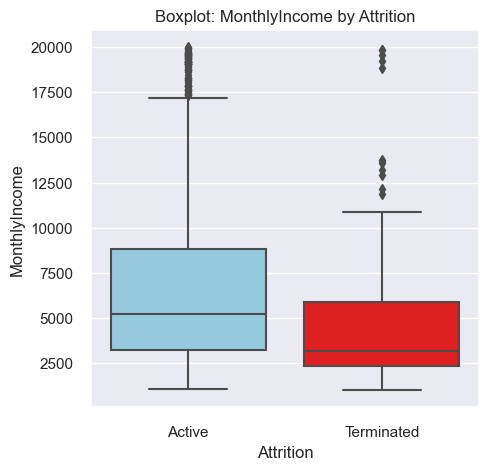

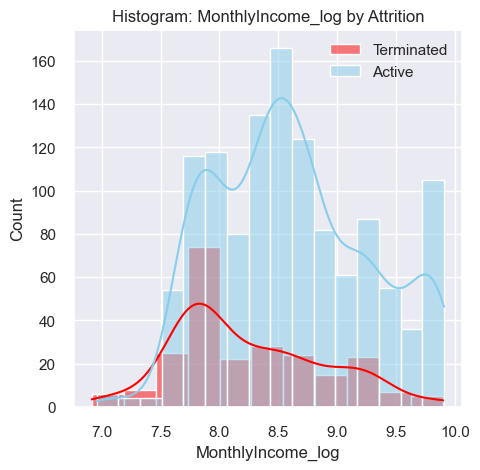

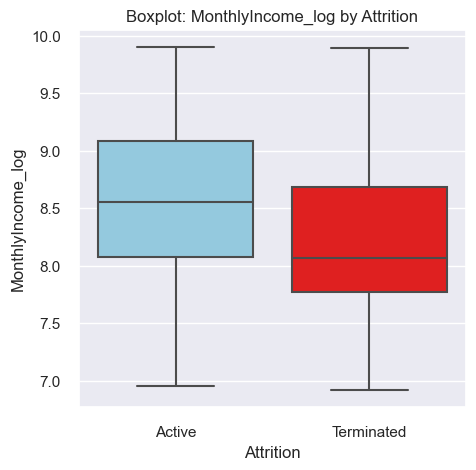

In [111]:
# boxplot
plt.figure(figsize = (5,5))
my_color = {0: "skyblue",1: "red"}
ax = sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette=my_color)
# add stripplot
#ax = sns.stripplot(x='Attrition', y='MonthlyIncome', data=df, color="k", jitter=0.4, size=4.5)
# add title
plt.title("Boxplot: MonthlyIncome by Attrition")
plt.xticks([0,1], ['Active', 'Terminated'])
plt.show()

#Log transformation of Monthlyincome
df['MonthlyIncome_log'] = np.log(df['MonthlyIncome'])

#histogram Plot
plt.figure(figsize = (5,5))
df_1 = df[df['Attrition'] == 1]
df_0 = df[df['Attrition'] == 0]
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
#Add MonthlyIncome Histrogram of those with Yes for Attrition with distribution curve 
sns.histplot(data=df_1, x="MonthlyIncome_log",color="red", label="Terminated", kde=True)
#Add MonthlyIncome Histrogram of those with No for Attrition with distribution curve 
sns.histplot(data=df_0, x="MonthlyIncome_log",color="skyblue", label="Active", kde=True)
plt.legend() 
plt.title('Histogram: MonthlyIncome_log by Attrition')
plt.show()

#boxplot
# boxplot
plt.figure(figsize = (5,5))
my_color = {0: "skyblue",1: "red"}
ax = sns.boxplot(x='Attrition', y='MonthlyIncome_log', data=df, palette=my_color)
# add stripplot
#ax = sns.stripplot(x='Attrition', y='MonthlyIncome', data=df, color="k", jitter=0.4, size=4.5)
# add title
plt.title("Boxplot: MonthlyIncome_log by Attrition")
plt.xticks([0,1], ['Active', 'Terminated'])
plt.show()

##Correlation Matrix

A correlation matrix which shows the correlation coefficients between variables. We have used the correlation matrix to observe patterns in the dataset and to see which variables are highly correlate with each other, positively or negatively. We have also used the matrix as a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.
High Correlation to Attrition:
Business Travel
Overtime
Monthly Income
Job Level
Years in Current Role
Total working years
Years at company
Years in the current role
Years with current manager


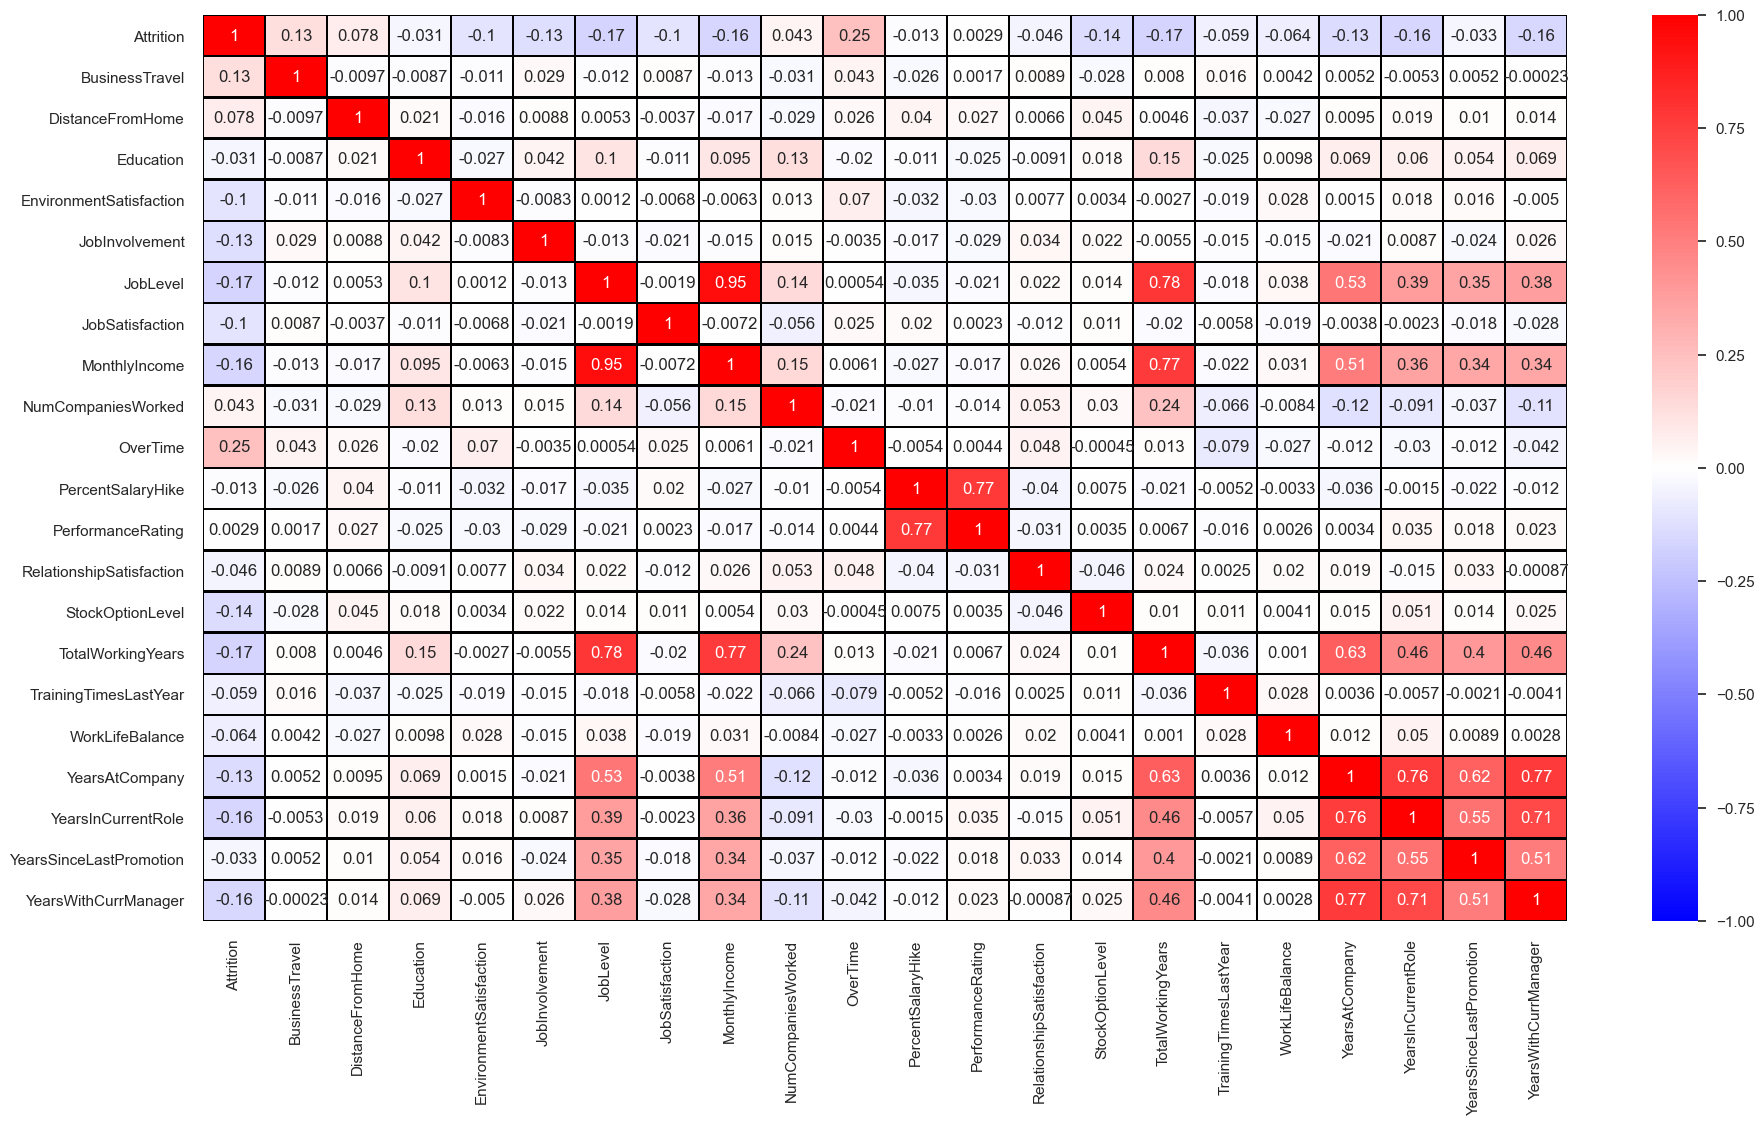

In [112]:
plt.figure(figsize = (22,12))
#Let's verify the correlation of each value 
#matrix = np.triu(df.corr()) #to split matrix in half add mask=matrix
sns.heatmap(ibm.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='bwr', linewidths=1, linecolor='black')#, mask=matrix)
plt.show()

# **Modeling**


Prior to modeling, the dataset was split into train and test. The data was split at %70 training and %30 test. To complete pre-processing, thee data was standardized to scale the variance of each variable. 


Several models were developed. First, all models were generated manually. After this initial model development, the Python library PyCaret was used. This allowed for a quick and easy comparison of the data against all models. The 8 Models generated are as follows: Linear Regression, Random Forest, Support Vector Machine, Logistic Regression, Decision Tree, Neural Network, K-Means Clustering and Gradient Boosting Classifier. 



#Pre-processing for Modeling 

## Splitting the Dataset


In [113]:

# dropping the target variable, as it will be stored in y
X = df1.drop('Attrition', axis =1)

In [114]:
# setting target variable to y 
y = df1.Attrition
y=y.astype(int)

In [115]:
# splitting data into test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [116]:
df1.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [117]:
y_train.value_counts()

0    869
1    160
Name: Attrition, dtype: int64

In [118]:
y_test.value_counts()

0    364
1     77
Name: Attrition, dtype: int64

##MinMaxScaler

In [119]:
# from sklearn.preprocessing import MinMaxScaler
# cols=df1.columns
# mms=MinMaxScaler()
# df1_norm=pd.DataFrame(mms.fit_transform(df1),columns=cols)
from sklearn.preprocessing import MinMaxScaler
cols=X_train.columns
mms=MinMaxScaler()
mms.fit(X_train)
X_train_mms=pd.DataFrame(mms.transform(X_train),columns=cols)
X_test_mms=pd.DataFrame(mms.transform(X_test),columns=cols)


In [120]:
X_train_mms

,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,OverTime,PercentSalaryHike,...,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MonthlyIncome_log
0,0.0,0.785714,0.50,0.333333,0.666667,0.25,0.333333,0.444444,0.0,0.071429,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.236137
1,0.5,0.678571,0.75,0.000000,0.666667,0.50,1.000000,0.444444,0.0,0.642857,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.778891
2,1.0,0.285714,0.50,1.000000,0.666667,1.00,0.333333,0.444444,1.0,0.928571,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.997880
3,0.5,0.642857,0.75,1.000000,0.666667,0.25,1.000000,0.888889,0.0,0.214286,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.453045
4,0.0,0.000000,0.75,1.000000,0.333333,0.25,0.666667,0.000000,0.0,0.285714,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.491293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,1.0,0.000000,0.75,0.666667,1.000000,0.25,0.333333,0.111111,1.0,0.142857,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.567291
1025,0.5,0.000000,0.50,1.000000,0.333333,0.75,1.000000,0.333333,0.0,0.214286,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.928294
1026,0.5,0.178571,0.25,0.666667,0.666667,0.75,1.000000,0.111111,1.0,0.714286,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.934734
1027,0.5,0.535714,0.50,1.000000,0.666667,0.75,1.000000,0.555556,1.0,0.785714,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.927045


##StandardScaler

In [121]:
from sklearn.preprocessing import StandardScaler
cols=X_train.columns
sc=StandardScaler()
sc.fit(X_train)
X_train_std=pd.DataFrame(sc.transform(X_train),columns=cols)
X_test_std=pd.DataFrame(sc.transform(X_test),columns=cols)


In [122]:
X_train_std

,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,OverTime,PercentSalaryHike,...,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MonthlyIncome_log
0,-2.005534,1.742140,0.092884,-0.669480,0.384204,-0.063108,-0.671766,0.492006,-0.624932,-0.888440,...,-0.133432,-0.832126,-0.347728,1.471786,-0.253211,-0.313346,-0.530514,1.088445,-0.690165,-1.407354
1,-0.141311,1.366162,1.078220,-1.586784,0.384204,0.838814,1.171561,0.492006,-0.624932,1.290832,...,-0.133432,-0.832126,-0.347728,-0.679447,-0.253211,3.191361,-0.530514,1.088445,-0.690165,1.039878
2,1.722911,-0.012423,0.092884,1.165128,0.384204,2.642657,-0.671766,0.492006,1.600173,2.380468,...,-0.133432,1.201741,-0.347728,-0.679447,-0.253211,-0.313346,1.884966,-0.918742,-0.690165,2.027283
3,-0.141311,1.240836,1.078220,1.165128,0.384204,-0.063108,1.171561,2.075351,-0.624932,-0.343622,...,-0.133432,-0.832126,-0.347728,-0.679447,3.949275,-0.313346,1.884966,-0.918742,-0.690165,-0.429336
4,-2.005534,-1.015031,1.078220,1.165128,-0.998124,-0.063108,0.249897,-1.091339,-0.624932,-0.071213,...,-0.133432,-0.832126,-0.347728,1.471786,-0.253211,-0.313346,-0.530514,1.088445,-0.690165,-0.256876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,1.722911,-1.015031,1.078220,0.247824,1.766532,-0.063108,-0.671766,-0.695502,1.600173,-0.616031,...,-0.133432,-0.832126,-0.347728,-0.679447,3.949275,-0.313346,-0.530514,1.088445,-0.690165,0.085793
1025,-0.141311,-1.015031,0.092884,1.165128,-0.998124,1.740736,1.171561,0.096170,-0.624932,-0.343622,...,-0.133432,1.201741,-0.347728,-0.679447,-0.253211,-0.313346,1.884966,-0.918742,-0.690165,1.713524
1026,-0.141311,-0.388401,-0.892452,0.247824,0.384204,1.740736,1.171561,-0.695502,1.600173,1.563241,...,-0.133432,-0.832126,-0.347728,1.471786,-0.253211,-0.313346,-0.530514,-0.918742,1.448930,1.742562
1027,-0.141311,0.864859,0.092884,1.165128,0.384204,1.740736,1.171561,0.887843,1.600173,1.835650,...,-0.133432,-0.832126,2.875808,-0.679447,-0.253211,-0.313346,-0.530514,1.088445,-0.690165,1.707894


#Model 1 : Multiple Linear Regression

To model the relationship between more explanatory(input) variables and target Employee Attrition variable by fitting a linear equation to observed data assuming every value of the independent variable x is associated with a value of the dependent variable y.

In [123]:
# Several sklearn libraries were imported for modeling and model metrics visualization and comparison
from sklearn.metrics import mean_squared_error
import seaborn as sns
# library to test model accuracy and other key metrics
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
lm = linear_model.LinearRegression()
# dropping the target variable, as it will be stored in y
X = df1.drop('Attrition', axis =1)
# setting target variable to y 
y = df1.Attrition
y=y.astype(int)

results = lm.fit(X,y)
predictions = lm.predict(X)
lm.score(X,y), lm.coef_, lm.intercept_
#lm.score(X,y)  # Rsquare
#lm.coef_       # slope
#lm.intercept_  # Intercept






(0.25813879166781895,
 array([ 0.08065545,  0.00365505, -0.00041095, -0.0421586 , -0.06167858,
         0.05116873, -0.03713869,  0.01676461,  0.21006189, -0.0018741 ,
         0.01289547, -0.02463455, -0.01758992, -0.00607192, -0.01558551,
        -0.02993993,  0.0058416 , -0.00797133,  0.0107983 , -0.00882051,
        -0.07896303,  0.11139451,  0.01592967,  0.00127166, -0.06823197,
        -0.04396913, -0.08342774,  0.02607905,  0.11991698, -0.08520355,
         0.05583601,  0.02936755,  0.09593718, -0.04150922, -0.00131136,
        -0.05213836, -0.05613353,  0.05515528, -0.04040619, -0.03029345,
         0.07069965, -0.13926609]),
 1.6774105504920167)

# Model 2: Random Forest

A random forest is related to a Decision Tree in that a forest is made up of 
several decision trees. Each tree is dependent on a randoly selected sample. When used in classification, each tree will get a "vote" and whichever class has the most votes is selected.





In [125]:

from sklearn.ensemble import RandomForestClassifier

In [126]:
#random forest with 20 trees and a random state of 2.
crf = RandomForestClassifier(n_estimators=20, random_state = 2)
y_pred = crf.fit(X_train,y_train).predict(X_test)

In [127]:
# mean squared error and root mean squared error
mse_val = mean_squared_error(y_test,y_pred)
rmse_val = np.sqrt(mse_val)
# printing metrics and classification report
print(f"Mean Squared Error (MSE) for Random Forest Model = {mse_val}")
print(f"Root Mean Squared Error (RMSE) for Random Forest Model = {rmse_val}")
print(f"Confusion Matrix =\n", confusion_matrix(y_test,y_pred))
print(f"Classification report =\n",classification_report(y_test,y_pred))
print('Accuracy for Random Forest: %.2f ' % accuracy_score(y_test, y_pred))
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))





Mean Squared Error (MSE) for Random Forest Model = 0.15419501133786848
Root Mean Squared Error (RMSE) for Random Forest Model = 0.392676726249301
Confusion Matrix =
 [[357   7]
 [ 61  16]]
Classification report =
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       364
           1       0.70      0.21      0.32        77

    accuracy                           0.85       441
   macro avg       0.77      0.59      0.62       441
weighted avg       0.83      0.85      0.81       441

Accuracy for Random Forest: 0.85 



 A feature importance was conducted to several models, including the Random
Forest. A feature importance assigns a score to each variable to indicate the importance of each variable in predicting the target variable. This was done to give more insight into the model and to identify key features, and also less significant features that may be dropped. 

In [128]:
# feature importance for random forest
importances = crf.feature_importances_
# sort features in order of importance
indices = np.argsort(importances)[::-1]
# pull column names
names = [X_train.columns[i] for i in indices]

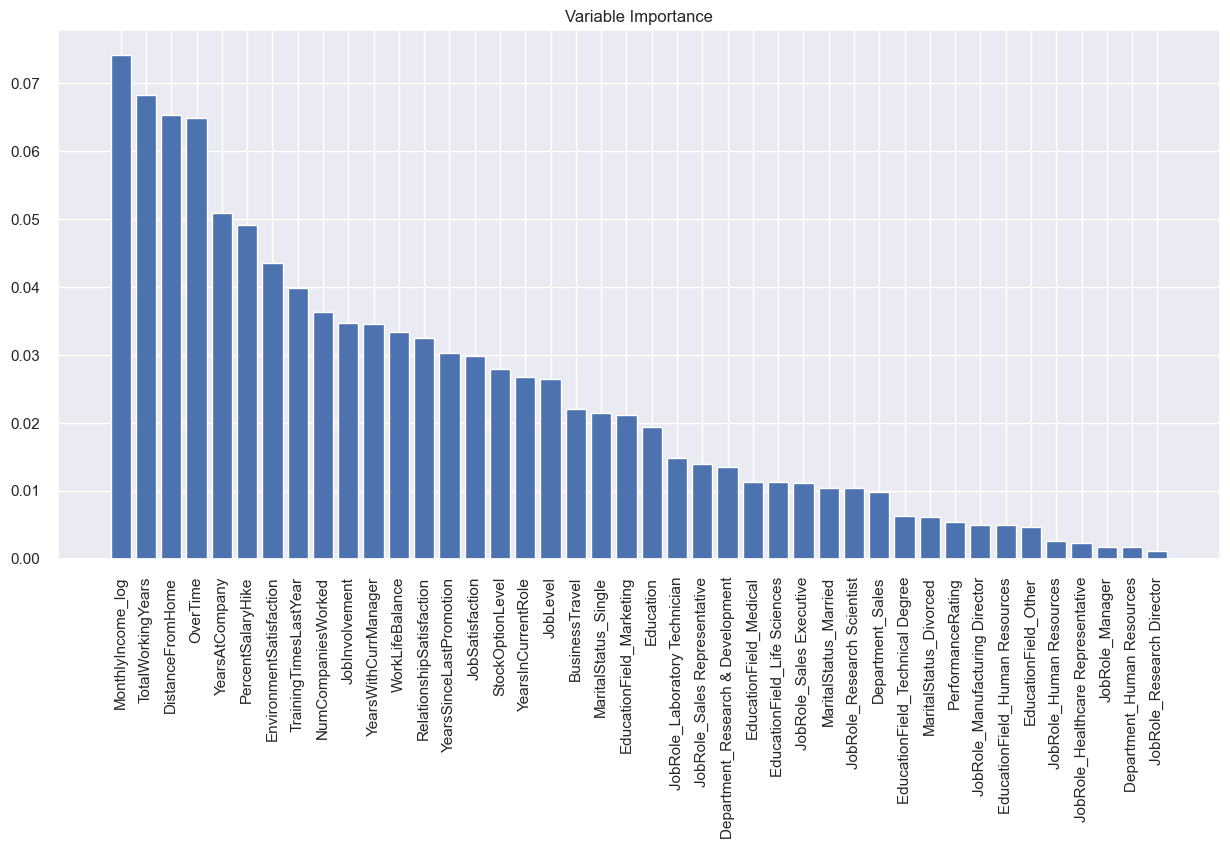

In [129]:
# showing how much each feature is utilized in tree 
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Variable Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

# Model 3: SVM

In [130]:

from sklearn.svm import SVC


X = df1.drop(['Attrition'],axis=1)
y = df1.Attrition
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

mse_val = mean_squared_error(y_test,y_pred)
rmse_val = np.sqrt(mse_val)
print(f"Mean Squared Error (MSE) for SVM Model = {mse_val}")
print(f"Root Mean Squared Error (RMSE) for SVM Model = {rmse_val}")
print(f"Confusion Matrix =\n", confusion_matrix(y_test,y_pred))
print(f"Classification report =\n",classification_report(y_test,y_pred))
print('Accuracy for SVM: %.2f ' % accuracy_score(y_test, y_pred))


Mean Squared Error (MSE) for SVM Model = 0.12018140589569161
Root Mean Squared Error (RMSE) for SVM Model = 0.34667189948954846
Confusion Matrix =
 [[362   9]
 [ 44  26]]
Classification report =
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       371
           1       0.74      0.37      0.50        70

    accuracy                           0.88       441
   macro avg       0.82      0.67      0.71       441
weighted avg       0.87      0.88      0.86       441

Accuracy for SVM: 0.88 


# Model 4 : Logistic Regression

Logistic Regression is used as the target variable(Employee Attrition) is categorical to estimate the parameters using logistic model.

In [131]:
# dropping the target variable, as it will be stored in y
X = df1.drop('Attrition', axis =1)
# setting target variable to y 
y = df1.Attrition
y=y.astype(int)


# Split data into train-validate. (Test will be on Kaggle.)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)

mse_val = mean_squared_error(y_test,y_pred)
rmse_val = np.sqrt(mse_val)
print(f"Mean Squared Error (MSE) for Logistic Regression Model = {mse_val}")
print(f"Root Mean Squared Error (RMSE) for Logistic Regression Model = {rmse_val}")
print(f"Confusion Matrix =\n", confusion_matrix(y_test,y_pred))
print(f"Classification report =\n",classification_report(y_test,y_pred))
print('Accuracy for Logistic Regression: %.2f ' % accuracy_score(y_test, y_pred))


Mean Squared Error (MSE) for Logistic Regression Model = 0.12471655328798185
Root Mean Squared Error (RMSE) for Logistic Regression Model = 0.35315230890931726
Confusion Matrix =
 [[358  13]
 [ 42  28]]
Classification report =
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       371
           1       0.68      0.40      0.50        70

    accuracy                           0.88       441
   macro avg       0.79      0.68      0.72       441
weighted avg       0.86      0.88      0.86       441

Accuracy for Logistic Regression: 0.88 


# Recursive Feature Elimination, Logistic Regression

RFE is a method of feature selection that will fit a model, and then iteratively loop through ad consider a smaller njumber of features each time.The model is pruned back until it reaches the number of features that were selected. In the below instance, RFE was set to 10 variables. 



In [132]:
from sklearn.feature_selection import RFE
rfe = RFE(lr, 10)
fit = rfe.fit(X_train_std, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

# summarize the selection of the attributes
print(f"Number of selected features: {rfe.n_features_}\n\
Mask: {rfe.support_}\n\
Selected Features:", [feature for feature, rank in zip(X.columns.values, rfe.ranking_) if rank==1],"\n\
Estimator : {rfe.estimator_}")



C:\Users\n\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\n\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\n\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the 

Num Features: 10
Selected Features: [False False False  True False False False False  True False False False
 False False False False False False  True  True False  True False False
 False False False False False  True False False False  True False  True
 False False False False  True  True]
Feature Ranking: [ 3  7 33  1  9 10  8  6  1 29 30 16 26  5 21 12  4  2  1  1 19  1 31 23
 18 11 17 14 13  1 15 28 20  1 25  1 32 24 22 27  1  1]
Number of selected features: 10
Mask: [False False False  True False False False False  True False False False
 False False False False False False  True  True False  True False False
 False False False False False  True False False False  True False  True
 False False False False  True  True]
Selected Features: ['EnvironmentSatisfaction', 'OverTime', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'JobRole_Human Resources', 'Department_Human Resources', 'EducationField_Life Sciences', 'EducationField_Medical', 'MaritalStatus_Single', 'MonthlyIncome_lo

# Model 5 : Decision Tree

Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of Emploee Attrition(target variable) by learning simple decision rules inferred from the data features.

C:\Users\n\anaconda3\lib\site-packages\sklearn\tree\_export.py:184: FutureWarning: 'rotate' has no effect and is deprecated in 0.23. It will be removed in 1.0 (renaming of 0.25).
  warnings.warn(("'rotate' has no effect and is deprecated in 0.23. "


Mean Squared Error (MSE) for Decision Tree Model = 0.21315192743764172
Root Mean Squared Error (RMSE) for Decision Tree Model = 0.4616837959444123
Confusion Matrix =
 [[319  52]
 [ 42  28]]
Classification report =
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       371
           1       0.35      0.40      0.37        70

    accuracy                           0.79       441
   macro avg       0.62      0.63      0.62       441
weighted avg       0.80      0.79      0.79       441

Accuracy for Decision Tree: 0.79 


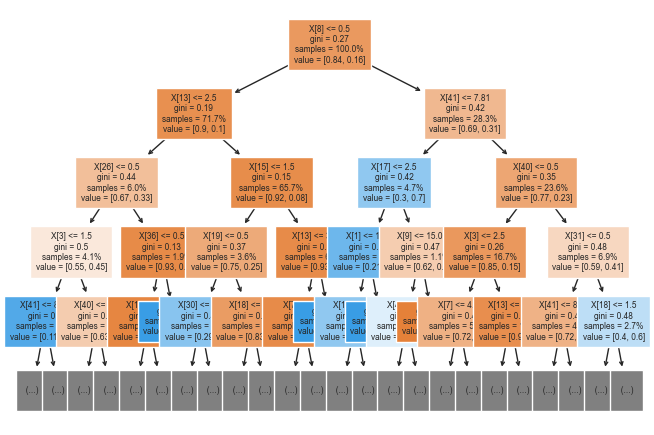

In [133]:
# dropping the target variable, as it will be stored in y
X = df1.drop('Attrition', axis =1)
# setting target variable to y 
y = df1.Attrition
y=y.astype(int)

# Split data into train-validate. (Test will be on Kaggle.)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier 

import matplotlib.pyplot as plt # For plotting

from sklearn import tree

dt = DecisionTreeRegressor(random_state=0)
dt_fit = dt.fit(X_train_std,y_train)
y_pred = dt.predict(X_test_std)
plt.scatter(y_test,y_pred)

clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)
tree.plot_tree(model, max_depth=4, feature_names=None, class_names=None, label='all',
               filled=True, impurity=True, node_ids=False, proportion=True, rotate=False, rounded=False, precision=2, ax=None, fontsize=6 ) 
 
# Performance of Decision Tree 
mse_val = mean_squared_error(y_test,y_pred)
rmse_val = np.sqrt(mse_val)
accuracy_val = dt.score(X_test_std, y_test)
print(f"Mean Squared Error (MSE) for Decision Tree Model = {mse_val}")
print(f"Root Mean Squared Error (RMSE) for Decision Tree Model = {rmse_val}")
print(f"Confusion Matrix =\n", confusion_matrix(y_test,y_pred))
print(f"Classification report =\n",classification_report(y_test,y_pred))
print('Accuracy for Decision Tree: %.2f ' % accuracy_score(y_test, y_pred))


In [134]:
#create a function to get the importance of features

def feat_imp(dt, df1, text):
    importances = dt.feature_importances_
    
    #sort features in decreasing order of their importance
    indices = np.argsort(importances)[::-1]
    
    # Rearrange feature names so they match the sorted feature importances
    names = [X_train.columns[i] for i in indices]
       # Create plot
    plt.figure(figsize=(14,6))

    # Create plot title
    plt.title(text)

    # Add bars
    plt.bar(range(X_train.shape[1]), importances[indices])

    # Add feature names as x-axis labels
    plt.xticks(range(X_train.shape[1]), names, rotation=90)

    # Show plot
    plt.show()

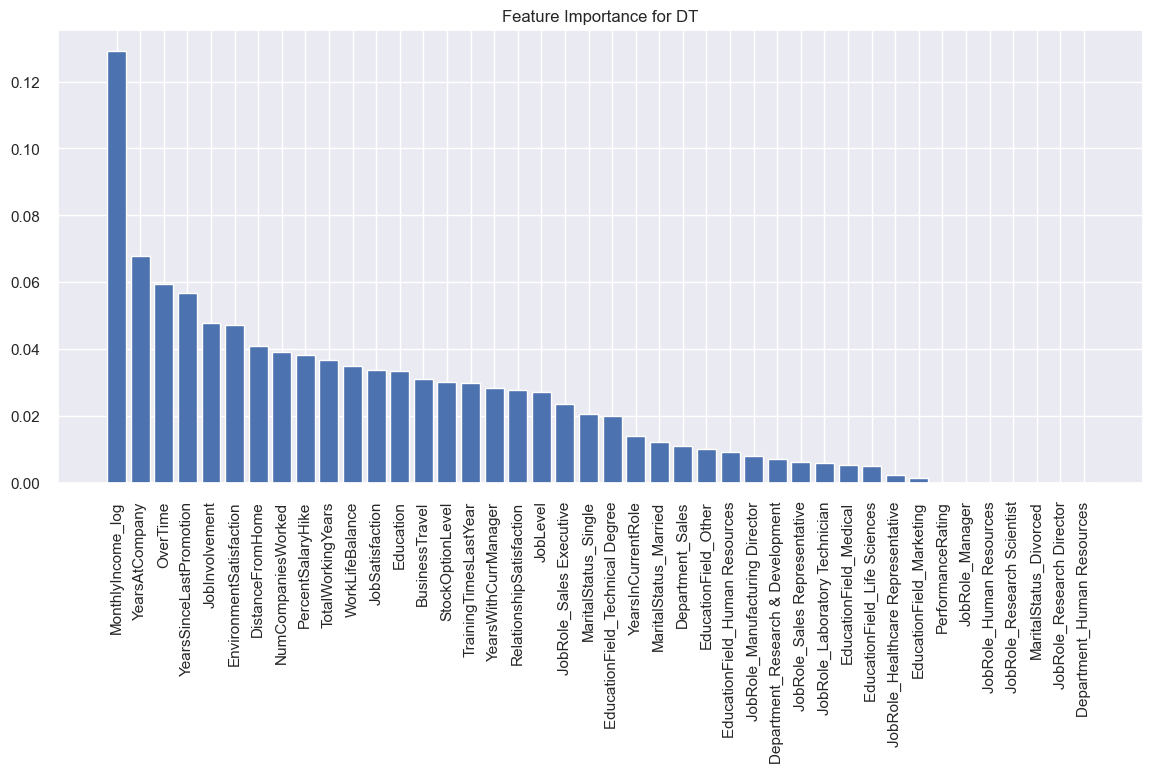

In [135]:
feat_imp(dt,df1, "Feature Importance for DT")

# Model 6 : Neural Network

## Multilayer perceptron(MLP) is a type of artificial neural network (ANN) which utilizes a supervised learning technique called backpropagation for training.

In [136]:
# dropping the target variable, as it will be stored in y
X = df1.drop('Attrition', axis =1)
# setting target variable to y 
y = df1.Attrition
y=y.astype(int)

# Split data into train-validate. (Test will be on Kaggle.)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

mlp = MLPRegressor(hidden_layer_sizes=(5,5),max_iter=530)
mlp.fit(X_train,y_train)
 
y_pred = mlp.predict(X_test)
print('R Squared Score for Neural Network is:%.2f'% r2_score(y_test, y_pred))


R Squared Score for Neural Network is:0.19


# Model 7: KMean Clustering

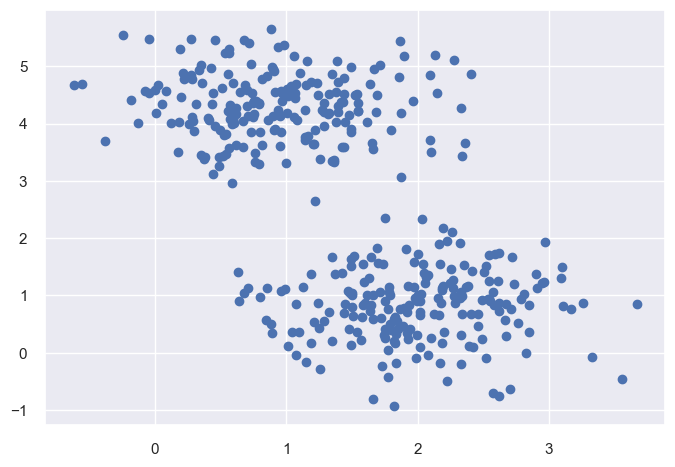

In [137]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X = df1.drop(['Attrition'],axis=1)
y = df1.Attrition
X, y = make_blobs(n_samples=400, centers=2, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

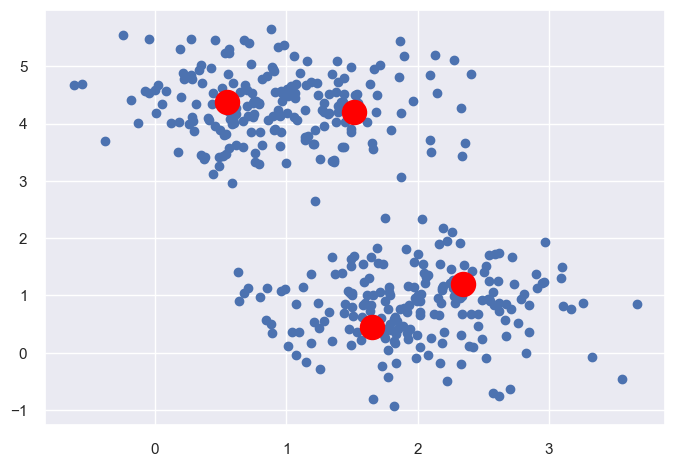

In [138]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

#Model 8: Gradient Boosting Classifier

Gradient Boosting is an ensemble technique that combines several weaker variables (less predictive power) into a stronger model. Similar to a Random Forest, its a compilation of several weaker models into one more accurate model.Each iteration improves upon all before it. So the final model is the sum of all previous prediction models.

In [139]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


X = df1.drop(['Attrition'],axis=1)
y = df1.Attrition
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)
grb = GradientBoostingClassifier()
grb.fit(X_train, y_train)
y_pred = grb.predict(X_test)

In [140]:
mse_val = mean_squared_error(y_test,y_pred)
rmse_val = np.sqrt(mse_val)
print(f"Mean Squared Error (MSE) for SVM Model = {mse_val}")
print(f"Root Mean Squared Error (RMSE) for SVM Model = {rmse_val}")
print(f"Confusion Matrix =\n", confusion_matrix(y_test,y_pred))
print(f"Classification report =\n",classification_report(y_test,y_pred))
print('Accuracy for Gradient Boosting Classifier: %.2f ' % accuracy_score(y_test, y_pred))

Mean Squared Error (MSE) for SVM Model = 0.13378684807256236
Root Mean Squared Error (RMSE) for SVM Model = 0.3657688451366004
Confusion Matrix =
 [[360  11]
 [ 48  22]]
Classification report =
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       371
           1       0.67      0.31      0.43        70

    accuracy                           0.87       441
   macro avg       0.77      0.64      0.68       441
weighted avg       0.85      0.87      0.85       441

Accuracy for Gradient Boosting Classifier: 0.87 


In [141]:
#create a function to get the importance of features

def feat_imp(grb, df1, text):
    importances = grb.feature_importances_
    
    #sort features in decreasing order of their importance
    indices = np.argsort(importances)[::-1]
    
    # Rearrange feature names so they match the sorted feature importances
    names = [X_train.columns[i] for i in indices]
       # Create plot
    plt.figure(figsize=(14,6))

    # Create plot title
    plt.title(text)

    # Add bars
    plt.bar(range(X_train.shape[1]), importances[indices])

    # Add feature names as x-axis labels
    plt.xticks(range(X_train.shape[1]), names, rotation=90)

    # Show plot
    plt.show()

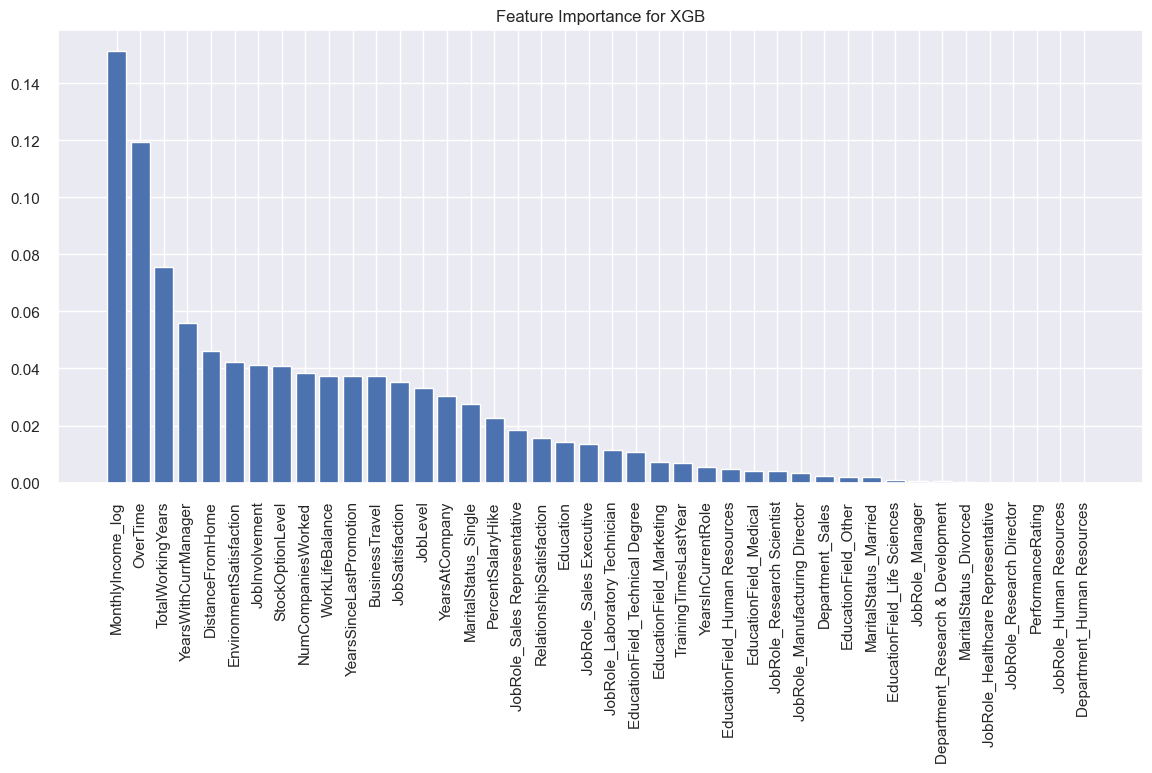

In [142]:
feat_imp(grb,df1, "Feature Importance for XGB")

# ROC Curves 

In [143]:
# predict probabilities
pred_prob1 = crf.predict_proba(X_test)
pred_prob2 = lr.predict_proba(X_test)
pred_prob3 = grb.predict_proba(X_test)



In [144]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [145]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])



auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])

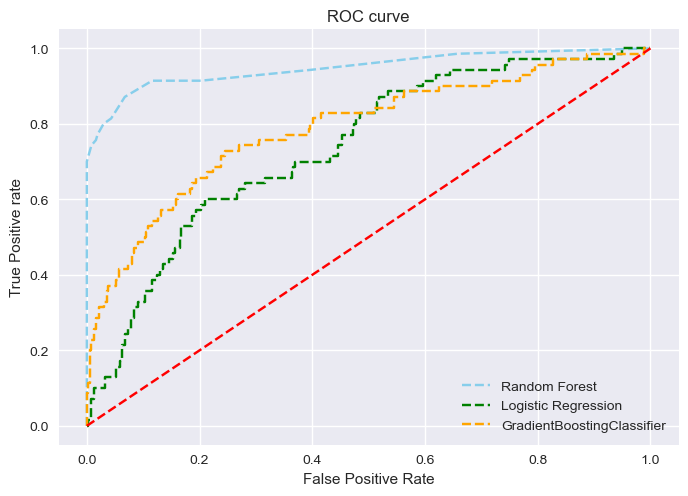

In [146]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='skyblue', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Logistic Regression')
plt.plot(fpr3, tpr3, linestyle='--',color='orange', label='GradientBoostingClassifier')

plt.plot(p_fpr, p_tpr, linestyle='--', color='red')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# Findings / Reccomendations

The feature selection of the final Logistic Regression Model can be seen above. Level of Business Travel, Job Satisfaction, Enviornment Satisfac and Job Level were all significant in the model. 

One variable that was signficant across all analysis: feature selection, RFE and the PyCaret Analysis, was "totalworkingyears." An employee's years in career, patricularly in the 5-10 year range, was extremely significant.Not only was this in line with the Attrition literature studied, it is very logical. In today's job market, employees typically do not receive pensions. Their retirement can travel with them and pay bumps are more likely when jumping between companies. There isn't as much incentive to be loyal to a company. To offset this trend, implement early career/junior development programs. This would give employees more of a sense of owernship/control in their own career path, and potential path to move upwards.

Overtime and salary were also extremely significant. To ensure employees are paid accurately, consider conducting an analysis on market standards. In addition to that, reduce overtime where possible and work to ensure your company culture has an appropriate work/life balance.

# **Sources/Citations**

> https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

> https://pypi.org/project/sweetviz/

> https://pycaret.org/